In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import random as rd
import copy
import time

In [2]:
class Independent_Cascade():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.probability = None

    def fit(self, g):
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for e in g.edges():
            if(in_degree[e[1]] >= 10):
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1 / int(np.log(in_degree[e[1]]))
            else:
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1
        
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
    
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        while(True):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        for step in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

In [3]:
class Decreasing_Cascade():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.max_in_degree = 0
        self.probability = None

    def fit(self, g):
        # fit graph with probability
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        self.max_in_degree = max(j for _, j in g.in_degree(weight='None'))
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for e in g.edges():
            if(in_degree[e[1]] >= 10):
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1 / int(np.log(in_degree[e[1]]))
            else:
                self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1
            
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
        
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        inform_times = np.zeros(self.num_nodes)
        while(True):
            new_activated_nodes = []
            new_inform_times = np.zeros(self.num_nodes)
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    new_inform_times[neighbor] += 1
                    if (self.probability[node][neighbor] >= (rd.random()+ inform_times[neighbor] / self.max_in_degree) ):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
            inform_times = inform_times + new_inform_times
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        inform_times = np.zeros(self.num_nodes)
        for step in range(max_step):
            new_activated_nodes = []
            new_inform_times = np.zeros(self.num_nodes)
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    new_inform_times[neighbor] += 1
                    if (self.probability[node][neighbor] >= (rd.random()+ inform_times[neighbor] / self.max_in_degree) ):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
            inform_times = inform_times + new_inform_times
        return activated_nodes, activate_nums

In [4]:
class Weighted_Cascade():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.probability = None

    def fit(self, g):
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for e in g.edges():
            self.probability[self.label2id[e[0]], self.label2id[e[1]]] = 1 / in_degree[e[1]]
        
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
    
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        while(True):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        for step in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

In [5]:
class Trivalency_Model():
    def __init__(self):
        self.g = nx.DiGraph()
        self.num_nodes = 0
        self.node_label = []
        self.label2id = {}
        self.probability = None

    def fit(self, g):
        self.g = g
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        in_degree = g.in_degree(weight='None')
        self.probability = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        p_list = [0.1, 0.01, 0.001]
        for e in g.edges():
            self.probability[self.label2id[e[0]], self.label2id[e[1]]] = rd.choice(p_list)

        
    def monte_carlo_diffusion_all(self, seed_nodes, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_all(seed_nodes)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)

    def monte_carlo_diffusion_step(self, seed_nodes, max_step=1, num_simulations=100):
        if(seed_nodes == []):
            return [], []
        activate_nums_list = []
        for _ in range(num_simulations):
            _, activate_nums = self.diffusion_step(seed_nodes, max_step)
            activate_nums_list.append(activate_nums)
        narry = np.zeros([len(activate_nums_list),len(max(activate_nums_list,key = lambda x: len(x)))])
        for i,j in enumerate(activate_nums_list):
            narry[i][0:len(j)] = j
        return np.mean(narry, axis=0)
    
    # diffusion to all possible nodes
    def diffusion_all(self, seed_nodes):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        while(True):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

    # diffusion to max step
    def diffusion_step(self, seed_nodes, max_step=1):
        if(seed_nodes == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in seed_nodes]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        activate_nums = [len(activated_nodes)]
        for step in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.probability[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    if(neighbor in activated_nodes and neighbor not in new_activated_nodes):
                        continue
                    if (self.probability[node][neighbor] >= rd.random()):
                        new_activated_nodes.append(neighbor)
            activated_nodes.extend(new_activated_nodes)
            if len(new_activated_nodes) == 0:
                break
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            activate_nums.append(len(new_activated_nodes))
        return activated_nodes, activate_nums

In [9]:
class linear_threshold():
    def __init__(self):
        self.g = nx.DiGraph()
        self.influence = None
    
    def fit(self, g):
        # fit graph with probability
        in_degree = g.in_degree()
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        max_degree = max([d for (n, d) in in_degree])
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        self.influence = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        # init influence 
        for e in g.edges():
            self.influence[self.label2id[e[0]], self.label2id[e[1]]] = 1 / in_degree[e[1]]
        self.g = g
        return g
    
    # diffusion to all possible nodes
    def diffusion_all(self, init_seed, threshold=0.001):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_activated_nodes)]
        while True:
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    total_influence = 0.0
                    if(neighbor in activated_nodes or neighbor in new_activated_nodes):
                        continue
                    precessors = self.influence[:, neighbor].nonzero()[0]
                    for precessor in precessors:
                        if precessor in activated_nodes:
                            total_influence += self.influence[precessor][neighbor]
                    if(total_influence >= threshold):
                        new_activated_nodes.append(neighbor)
            if len(new_activated_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    
    # diffusion to max step
    def diffusion_step(self, init_seed, threshold=0.1, max_step=1):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_activated_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_activated_nodes)]
        for _ in range(max_step):
            new_activated_nodes = []
            for node in old_activated_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    total_influence = 0.0
                    if(neighbor in activated_nodes or neighbor in new_activated_nodes):
                        continue
                    precessors = self.influence[:, neighbor].nonzero()[0]
                    for precessor in precessors:
                        if precessor in activated_nodes:
                            total_influence += self.influence[precessor][neighbor]
                    if(total_influence >= threshold):
                        new_activated_nodes.append(neighbor)
            if len(new_activated_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_activated_nodes = copy.deepcopy(new_activated_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    

In [8]:
class general_threshold():
    def __init__(self):
        self.g = nx.DiGraph()
        self.influence = None
        # threshold determine whether the node become activated
        self.threshold = None
        # spreadTrd determine whether the node have the ability to spread message
        self.spreadTrd = None
    
    def fit(self, g):
        # fit graph with probability
        in_degree = g.in_degree()
        self.num_nodes = g.number_of_nodes()
        self.node_label = [i for i in g.nodes()]
        self.label2id = {self.node_label[i]: i for i in range(self.num_nodes)}
        self.influence = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        centrality = nx.degree_centrality(g)
        # init influence
        for e in g.edges():
            self.influence[self.label2id[e[0]], self.label2id[e[1]]] = 1 / in_degree[e[1]]
        # init threshold. In GT model, the threshold of each node is assigned half of it's centrality
        self.threshold = np.zeros((self.num_nodes), dtype=float)
        self.spreadTrd = np.zeros((self.num_nodes), dtype=float)
        for n in g.nodes():
            self.threshold[self.label2id[n]] = centrality[n]/4
            self.spreadTrd[self.label2id[n]] = centrality[n]/2
        self.g = g
        return g
    
    # diffusion to all possible nodes
    def diffusion_all(self, init_seed):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_spread_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_spread_nodes)]
        while True:
            new_activated_nodes = []
            new_spread_nodes = []
            for node in old_spread_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    total_influence = 0.0
                    if(neighbor in activated_nodes or neighbor in new_activated_nodes):
                        continue
                    precessors = self.influence[:, neighbor].nonzero()[0]
                    for precessor in precessors :
                        if precessor in activated_nodes:
                            total_influence += self.influence[precessor][neighbor]
                    # informe/activate the node if the total influence exceeds it's threshold of activated
                    if(total_influence >= self.threshold[neighbor]):
                        new_activated_nodes.append(neighbor)
                        # let node be a spreader if the total influence exceeds it's threshold of spread
                        if(total_influence >= self.spreadTrd[neighbor]):
                            new_spread_nodes.append(neighbor)
            if len(new_spread_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_spread_nodes = copy.deepcopy(new_spread_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    
    # diffusion to max step
    def diffusion_step(self, init_seed, max_step=1):
        if(init_seed == []):
            return [], []
        activated_nodes = [self.label2id[name] for name in init_seed]
        old_spread_nodes = copy.deepcopy(activated_nodes)
        # the index represent time t, the value is number of activated nodes in current time
        times = [len(old_spread_nodes)]
        for _ in range(max_step):
            new_activated_nodes = []
            new_spread_nodes = []
            for node in old_spread_nodes:
                neighbors = self.influence[node, :].nonzero()[0]
                if(len(neighbors) == 0):
                    continue
                for neighbor in neighbors:
                    total_influence = 0.0
                    if(neighbor in activated_nodes or neighbor in new_activated_nodes):
                        continue
                    precessors = self.influence[:, neighbor].nonzero()[0]
                    for precessor in precessors:
                        if precessor in activated_nodes:
                            total_influence += self.influence[precessor][neighbor]
                    # informe/activate the node if the total influence exceeds it's threshold of activated
                    if(total_influence >= self.threshold[neighbor]):
                        new_activated_nodes.append(neighbor)
                        # let node be a spreader if the total influence exceeds it's threshold of spread
                        if(total_influence >= self.spreadTrd[neighbor]):
                            new_spread_nodes.append(neighbor)
            if len(new_spread_nodes)==0:
                break
            else:
                activated_nodes.extend(new_activated_nodes)
            old_spread_nodes = copy.deepcopy(new_spread_nodes)
            times.append(len(new_activated_nodes))
        return activated_nodes, times
    
    

In [10]:
def compare_models_num_seed(g, iter = 1000, num_seeds = 10):
  IC = Independent_Cascade()
  IC.fit(g)
  DC = Decreasing_Cascade()
  DC.fit(g)
  WC = Weighted_Cascade()
  WC.fit(g)
  TR = Trivalency_Model()
  TR.fit(g)
  LT = linear_threshold()
  LT.fit(g)
  GT = general_threshold()
  GT.fit(g)
  models = [IC, DC, WC, TR, LT, GT]
  times = np.zeros(6)
  steps = [[],[],[],[],[],[]]
  num_nodes = [[],[],[],[],[],[]]
  for _ in range(iter):
    seeds = rd.sample(list(g.nodes()), num_seeds)
    for i in range(len(models)):
      start_time = time.time()
      _, activate_nums = models[i].diffusion_all(seeds)
      end_time = time.time()
      num_nodes[i].append(sum(activate_nums))
      steps[i].append(len(activate_nums))
      times[i] += end_time - start_time
  return times/iter, np.mean(steps, axis=1), np.mean(num_nodes, axis=1)

In [11]:
G = nx.read_gml('PB2020.gml')
G = G.reverse()

In [12]:
def compare_models(g, iter = 1000, max_num_seeds = 10):
    times_list = []
    steps_list = []
    num_nodes_list = []
    for i in range(1, max_num_seeds+1):
        times, steps, num_nodes = compare_models_num_seed(G, iter, i)
        times_list.append(times)
        steps_list.append(steps)
        num_nodes_list.append(num_nodes)
    return np.array(times_list), np.array(steps_list), np.array(num_nodes_list)

In [13]:
times, steps, num_nodes = compare_models(G, 500, 40)

In [14]:
print(times)
print(steps)
print(num_nodes)

[[6.46229601e-03 7.00844479e-03 2.74709702e-04 3.50372314e-04
  9.00889235e-02 1.92686548e-02]
 [1.36288171e-02 1.58598509e-02 5.00928879e-04 5.87230682e-04
  1.94888998e-01 2.97102165e-02]
 [1.43329067e-02 1.26493106e-02 7.35972404e-04 8.09993267e-04
  1.69304121e-01 7.15909147e-03]
 [1.95274358e-02 2.11447597e-02 1.12350178e-03 1.10506582e-03
  2.28274645e-01 1.14591517e-02]
 [2.80648875e-02 2.65868359e-02 1.53396130e-03 1.40347672e-03
  3.00975175e-01 1.80036898e-02]
 [3.10807281e-02 3.25036254e-02 1.59381008e-03 1.74664593e-03
  3.67397414e-01 2.18871231e-02]
 [3.26442251e-02 3.48539314e-02 1.68967295e-03 1.90211296e-03
  3.78326987e-01 2.75834732e-02]
 [3.80089221e-02 4.33239489e-02 1.95698214e-03 2.29968548e-03
  4.36724696e-01 3.64058914e-02]
 [4.37217517e-02 4.41440148e-02 2.49359083e-03 2.65783787e-03
  4.87442245e-01 4.09940577e-02]
 [4.87634883e-02 4.73223829e-02 2.51424694e-03 2.88661575e-03
  5.23472812e-01 4.67613773e-02]
 [5.65730948e-02 5.80165043e-02 3.12461424e-03 3.4

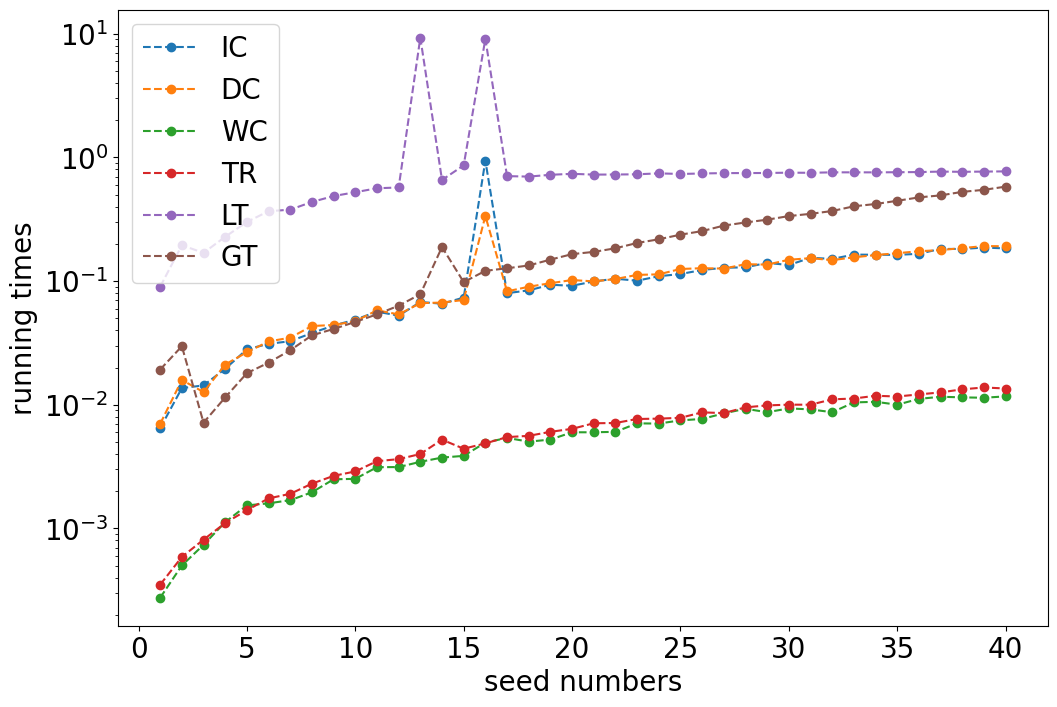

In [15]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(times[:, 0])+1), times[:,5], 'o--', label='GT')

plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('running times', fontsize=20)
plt.legend(fontsize=20)

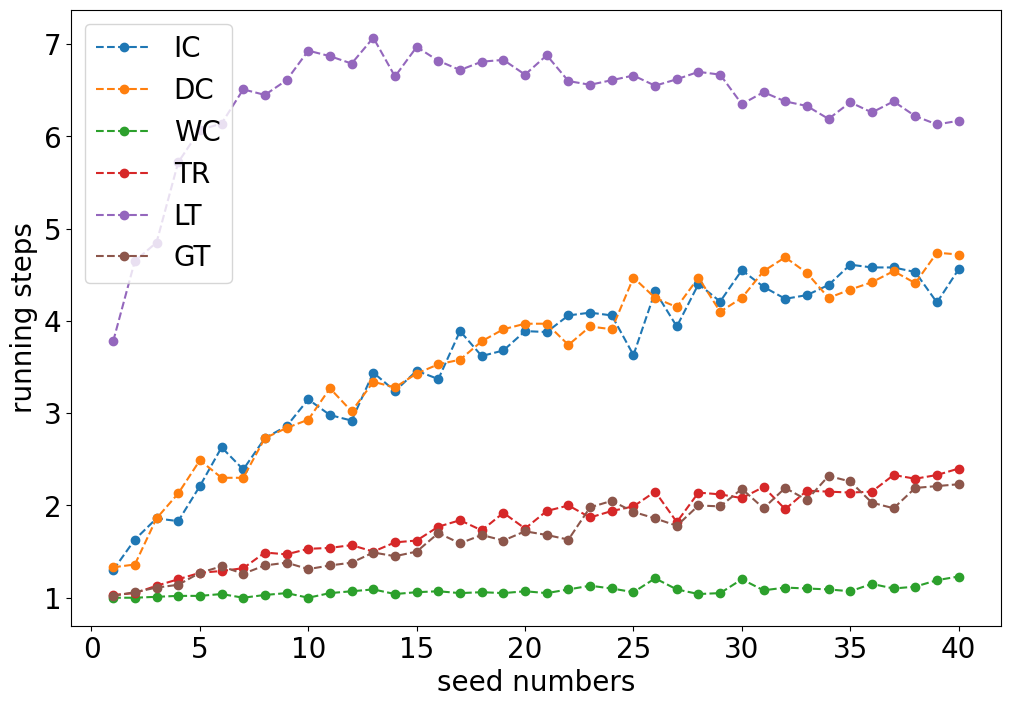

In [14]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(steps[:, 0])+1), steps[:,5], 'o--', label='GT')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('running steps', fontsize=20)
plt.legend(fontsize=20)

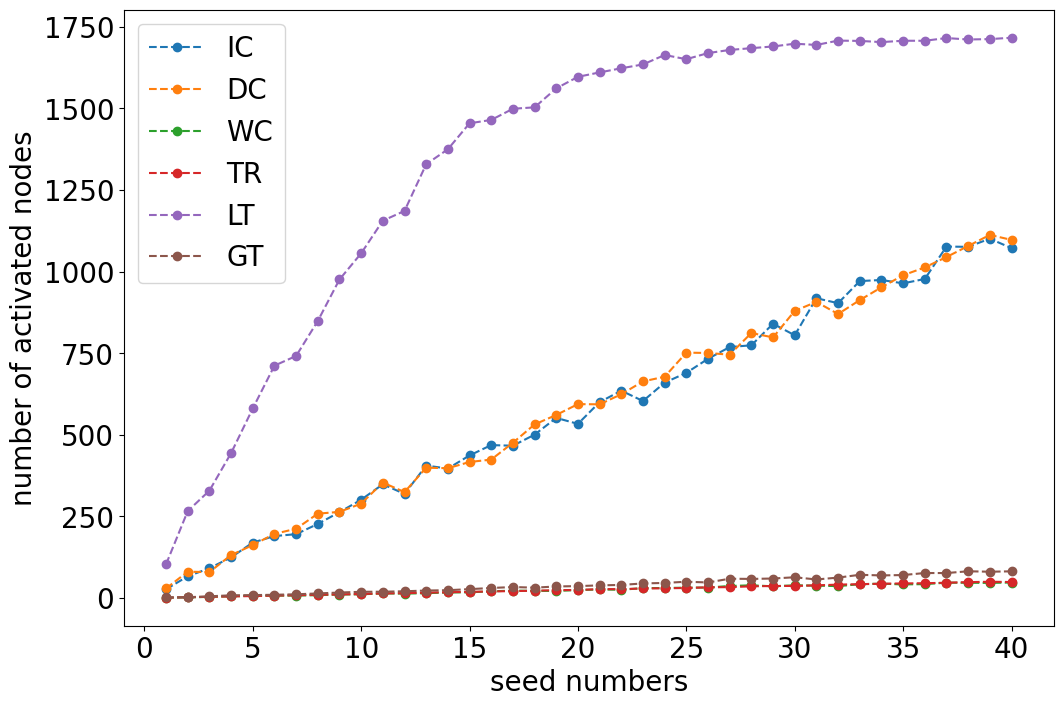

In [16]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,0], 'o--', label='IC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,1], 'o--', label='DC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,2], 'o--', label='WC')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,3], 'o--', label='TR')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,4], 'o--', label='LT')
plt.plot(np.arange(1, len(num_nodes[:, 0])+1), num_nodes[:,5], 'o--', label='GT')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('seed numbers', fontsize=20)
plt.ylabel('number of activated nodes', fontsize=20)
plt.legend(fontsize=20)